# Single Machine Infinite Bus

In [1]:
#Import packages.
using QuDiffEq               # package containt quantum computing' solvers.
using OrdinaryDiffEq         # package containt solvers to solve ODEs.
using DifferentialEquations  # package containt solvers to solve differential equations.
using Plots                  # package to plot the figure.

#Define the ODEs for Single Machine Infinite Bus system with u[1] is the phase angle,
#and u[2] is the speed of synchronous machine.
function f(du,u,p,t)
    du[1] = u[2]-omega_R
    du[2] = (Pm - E*V*sin(u[1])/X - D*(u[2]-omega_R)/omega_R)*(omega_R/(2*H))
    end

#Paeameters for single machine infinite bus
omega_R = 120*pi # Reference speed.
Pm = 1           # mechanical power input.
E = 1.0566       # machine's voltage magnitude
V = 1            # voltage of infinite bus
X = 0.8805       # total reactance by d-axis.
D = 1.2          # damping constant 
H = 15;          # initial constant

## Small disturbance

In [2]:
u0 = [0.9851+0.02,omega_R] # initial condition for ODEs with small disturbance
h = 0.01                   # time steps
k = 2                      # the k_th order of Taylor expansion
tspan = (0.0,10.0)         # the time interval observing the model.
prob = ODEProblem(f,u0,tspan); # define the model for ODEs system.

In [3]:
qsol_small = solve(prob,QuLDE(k),dt = h,adaptive=false) # solving ODEs system by quantum computing.
qsol_small = transpose(qsol_small)                      # to make it easier to save and plot a figure we use transpose function.
sol_small = solve(prob,Tsit5(),dt = h,adaptive = false) # solving ODEs system by classical method.
sol_small = transpose(sol_small);

In [4]:
#Saving the results by DataFrames and CSV
using DataFrames
using CSV

# define DataFrame from the above results.
df = DataFrame(delta_quan = qsol_small[1,:],omega_quan = qsol_small[2,:],delta_ODE = sol_small[:,1],omega_ODE=sol_small[:,2])

# saving DataFrame as a CSV file.
CSV.write("SMIB_small.csv", df; append = false);    

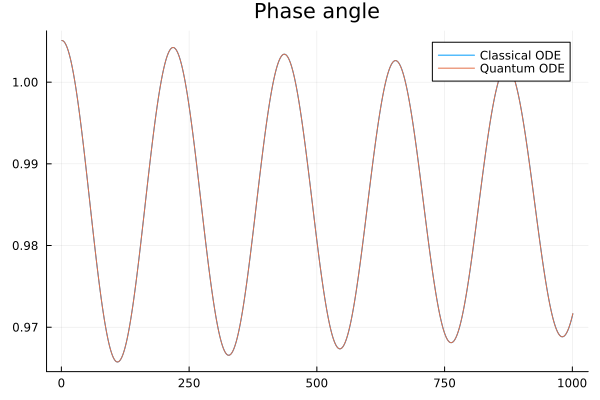

In [5]:
plot(sol_small[:,1], title = "Phase angle", label = "Classical ODE") # Plot the figure of phase angle of classical method.
plot!(qsol_small[1,:], label = "Quantum ODE")                        # plot the second line of quantum computing in the same figure. 

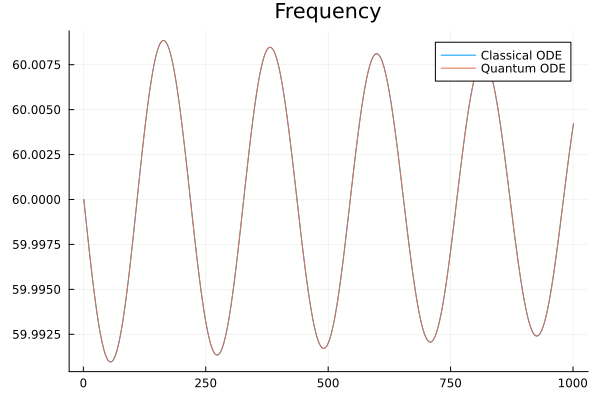

In [6]:
plot(sol_small[:,2]/(2*pi), title = "Frequency", label = "Classical ODE")
plot!(qsol_small[2,:]/(2*pi), label = "Quantum ODE")

## Large disturbance

In [7]:
u0 = [0.9851+0.4,omega_R,0.0,0.0]  # change initial condition for ODEs.
prob = ODEProblem(f,u0,tspan);     # define the model for ODEs system with new condition.

In [8]:
qsol_large = solve(prob,QuLDE(k),dt = h,adaptive=false) 
qsol_large = transpose(qsol_large)
sol_large = solve(prob,Tsit5(),dt = h,adaptive = false) 
sol_large = transpose(sol_large);

In [9]:
#Saving the results
using DataFrames
using CSV
df = DataFrame(delta_quan = qsol_large[1,:], omega_quan = qsol_large[2,:], delta_ODE = sol_large[:,1], omega_ODE=sol_large[:,2])
CSV.write("SMIB_large.csv", df; append = false);

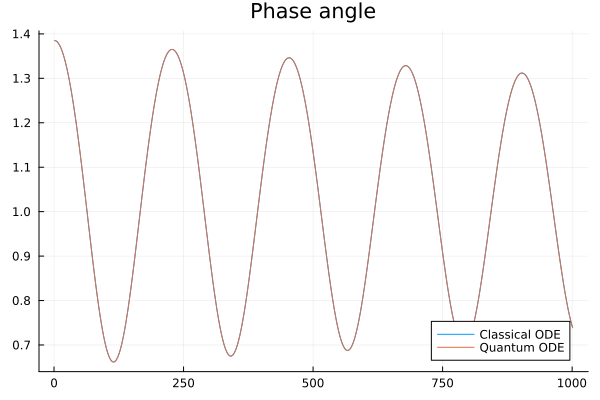

In [13]:
plot(sol_large[:,1], title = "Phase angle", label = "Classical ODE")
plot!(qsol_large[1,:], label = "Quantum ODE")

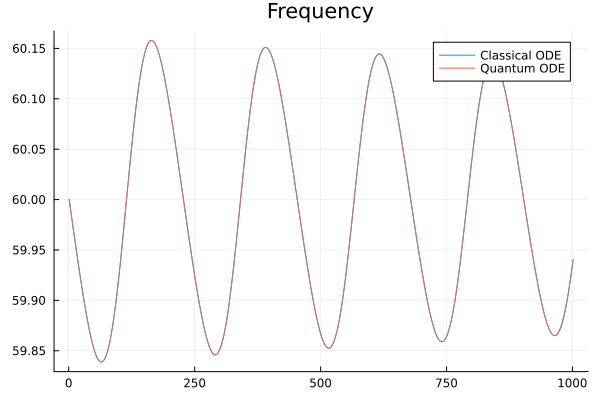

In [11]:
plot(sol_large[:,2]/(2*pi), title = "Frequency", label = "Classical ODE")
plot!(qsol_large[2,:]/(2*pi), label = "Quantum ODE")